In [15]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
nltk.download('stopwords')

from sklearn.feature_extraction.text  import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, \
                            accuracy_score, f1_score

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/Vera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data_school = pd.read_csv('word.csv', encoding = 'utf - 8', index_col = 0)

In [17]:
data_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 3629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   main_page  3593 non-null   object
 1   school     3604 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.5+ KB


In [18]:
data_school.describe()

,school
count,3604.000000
mean,0.488624
std,0.499940
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [19]:
data_school.head(10)

,main_page,school
0,здравствуйте главный страница официальный сайт...,1
1,хостинг уважаемый пользователь вновь закрытый ...,1
3,100 293 100 138 4 38 26 49 2 73 79 45 2 ...,1
4,адрес школа адрес адрес ул луначарский далее ...,1
5,юбилей любимый школа моу дубковский сош наш шк...,1
6,женский одежда больший размер главный страница...,0
7,ричард бричард народ ру официальный сайт кот...,0
8,о семья фотоальбом путешествие всякий другой п...,0
9,приносить свой извинение возможный ошибка рабо...,1
10,сдать квартира одесса долгосрочно посёлок кот...,0


In [20]:
data_school['main_page'][0]

'здравствуйте главный страница официальный сайт всош 30 главный визитка лицензия приоритетный национальный проект образование управлять совет положение управлять совет моу ош 30 публичный доклад 2009 2010 уч  г  результат егэ 2009 2010 уч  г  классный руководство  родитель правило приём школа психологический служба учиться режим работа учреждение библиотека интернет ресурс  фотогалерея форум найти официальный сайт вечерний сменный общеобразовательный школа 30 г анапа дом народ зваться вечерок весёлый народ который повторно учиться идти дом народ зваться вечерок учитель который собрать вбить весёлый народ который повторно учиться идти дом народ зваться вечерок директор знать корка корка теория практика вечерок толком работать учитель который собрать вбить весёлый народ который повторно учиться идти дом народ зваться вечерок  весёлый народ который повторно учиться идти кроха мир нитка собрать тот знание который мочь дать стать передряга сильный мудрый идти занятие скорый вечерний сменный

In [21]:
data_school = data_school.dropna()

In [22]:
X = data_school.drop(columns = ['school'])
y = data_school.drop(columns = ['main_page'])

In [23]:
data_school['school'].value_counts()

0    1832
1    1761
Name: school, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [25]:
X

,main_page
0,здравствуйте главный страница официальный сайт...
1,хостинг уважаемый пользователь вновь закрытый ...
3,100 293 100 138 4 38 26 49 2 73 79 45 2 ...
4,адрес школа адрес адрес ул луначарский далее ...
5,юбилей любимый школа моу дубковский сош наш шк...
...,...
3625,главный книга сделать бесплатный сайт
3626,мбоу кандатский средний школа главный страница...
3627,главный фото история правило видео терминологи...
3628,добрый пожаловать 8 класс эврика девиз искать ...


In [26]:
y

,school
0,1
1,1
3,1
4,1
5,1
...,...
3625,0
3626,1
3627,0
3628,1


In [27]:
def tokenaize(text):    
    # tokenize text
    tokens = word_tokenize(text, language='russian')
    return ' '.join(tokens)

In [28]:
X_train['main_page'] = X_train['main_page'].apply(tokenaize)
X_test['main_page'] = X_test['main_page'].apply(tokenaize)

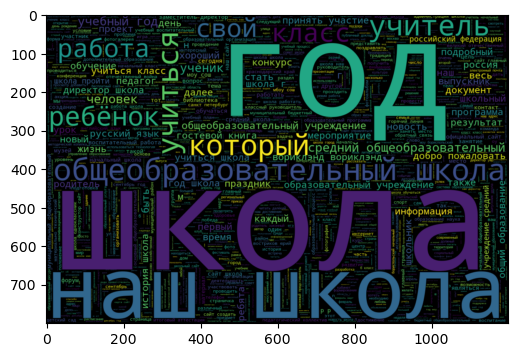

In [29]:
train_data = X_train.join(y_train)
world = train_data['main_page'][train_data['school'][train_data['school'] == 1].index]

fig, ax = plt.subplots(figsize=(8, 4))
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world))
plt.imshow(wordcloud, interpolation = 'bilinear')

In [30]:
X_train

,main_page
1131,головен стор нка уперш сайт дв дать наш екскур...
178,17 гостевой книга фото всё чат чат друг анекдо...
1486,наш школьный сайт балезинский сош 2 удмуртия г...
1116,пятница 05 05 2023 сайт главный регистрация вх...
1418,моу дмитриевский основный общеобразовательный ...
...,...
1138,главный альбом история ссылка гостевой новый ф...
1304,главный статья строительство дом выбор материа...
866,страничка кулерант главный гостевой книга о оп...
3543,новость рада приветствовать учебный образовате...


In [31]:
train_texts = list(X_train['main_page'])
test_texts = list(X_test['main_page'])

In [32]:
train_texts

['головен стор нка уперш сайт дв дать наш екскурс ю стор нками сайт тот ознайоться з ц кавими особливость сайт лисог рська зош ступена 1 новини школя н ц ативить адм н страц лисог рсько зош ступена 1 випуск ться льська громадська газета лисог рчанк де висв тлюються проблеми школя село кожный житель один з головний завдань газести збереженний р дно мовить р дный слово адж це обова язка кожный громадянин цей невеликий пер ода буть випустить номер газести новина газета лисог рчанк читать стор нц новина оголошенний увага шановна випускник з 1 листопать 1 грудня ви мочь заря струватися випробуватить сво силь скласть пробня зовна шн незалежень оц нюванний навчальний досягнень випускник навчальний заклад системь загальный середньо осв ти пробня тестуванний обова язковить головной мета проведенний дтворенний ум тот технолог й проведенний тестуванний оголошенний гот мося зно читать стор нц оголошень школа стор школя наш учн наш випускник наш вчитело новини фотогалерея гостьов книга як ви дносит

In [33]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 150)

In [34]:
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_texts).toarray()
tfidf_vectorizer.get_feature_names_out()

array(['00', '01', '05', '10', '100', '1086', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '2008', '2009', '2012', '2013',
       '2023', '21', '22', '23', '24', '25', '26', '30', 'администрация',
       'адрес', 'английский', 'бесплатный', 'быть', 'ваш', 'весь',
       'возможность', 'вопрос', 'время', 'выпускник', 'высокий',
       'главный', 'год', 'город', 'гостевой', 'далее', 'день', 'детский',
       'деятельность', 'директор', 'документ', 'дом', 'друг', 'другой',
       'жизнь', 'игра', 'иметь', 'интернет', 'информация', 'история',
       'каждый', 'класс', 'книга', 'колледж', 'конкурс', 'контакт',
       'который', 'курс', 'ломоносов', 'материал', 'мгу', 'мероприятие',
       'место', 'мир', 'москва', 'моу', 'мочь', 'муниципальный',
       'начальный', 'наш', 'новость', 'новый', 'область', 'образование',
       'образовательный', 'обучаться', 'обучение', 'общеобразовательный',
       'общий', 'один', 'организация', 'очень', 'педагог',
       'педагогически

In [35]:
tfidf_vectorizer.transform([" интернет  интернет регистрация регистрация школа презентация/ю Смысл школа"]).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8719497 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [36]:
len(X_train_tfidf)

2874

In [37]:
model = LogisticRegression(random_state = 42)

In [38]:
model

LogisticRegression(random_state=42)

In [39]:
model.fit(X_train_tfidf, y_train)

/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [40]:
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

print("Training scores:\n", classification_report(y_train, y_pred_train))
print("Testing scores:\n", classification_report(y_test, y_pred_test))

Training scores:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1463
           1       0.94      0.87      0.90      1411

    accuracy                           0.91      2874
   macro avg       0.91      0.91      0.91      2874
weighted avg       0.91      0.91      0.91      2874

Testing scores:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       369
           1       0.92      0.88      0.90       350

    accuracy                           0.91       719
   macro avg       0.91      0.91      0.91       719
weighted avg       0.91      0.91      0.91       719



In [359]:
from sklearn.cluster import KMeans

In [360]:
from sklearn.preprocessing import StandardScaler

In [64]:
X_sc = train_data.loc[train_data['school'] != 0]
X_sc = X_sc.drop(columns = 'school')
X_sc

,main_page
1131,головен стор нка уперш сайт дв дать наш екскур...
1486,наш школьный сайт балезинский сош 2 удмуртия г...
1116,пятница 05 05 2023 сайт главный регистрация вх...
1418,моу дмитриевский основный общеобразовательный ...
1961,школа компьютерный мастерство будущий ученик п...
...,...
3480,моу сош 16 ст георгиевский георгиевский район ...
332,школа мой жизнь начало извинить пожалуйста неу...
1247,неофициальный сайт школа 20 город борисов госу...
3125,сайт создать система уважаемый посетитель сайт...


In [397]:
scaler = StandardScaler()

In [66]:
train_texts = list(X_sc['main_page'])
X_sc_tfidf = tfidf_vectorizer.fit_transform(train_texts).toarray()

In [401]:
X_scaled = scaler.fit_transform(X_sc_tfidf)
X_scaled

array([[-0.26071043, -0.23851848, -0.22495021, ..., -0.28122067,
        -0.54538908, -0.28664276],
       [-0.26071043,  0.78359552,  1.69132775, ..., -0.28122067,
        -0.15154763,  1.52120396],
       [-0.26071043, -0.23851848, -0.22495021, ..., -0.28122067,
        -0.54538908, -0.28664276],
       ...,
       [-0.26071043, -0.23851848, -0.22495021, ..., -0.28122067,
        -0.54538908,  0.76300898],
       [-0.26071043, -0.23851848, -0.22495021, ..., -0.28122067,
        -0.54538908, -0.28664276],
       [-0.26071043, -0.23851848, -0.22495021, ..., -0.28122067,
         0.00880828, -0.28664276]])

In [409]:
len(X_scaled)

1411

In [402]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Vera/anaconda3/li

In [42]:
import pathlib
pathlib.Path('Test.csv').parent.resolve()

PosixPath('/Users/Vera')

In [67]:
examples = pd.read_csv('/Users/Vera/Test.csv', names = ['text'])
examples

,text
0,Расписание мероприятий по приему в лицей.
1,Общая вступительная работа по математике.
2,Для всех поступающих требуется регистрация уча...
3,Правильно выбранное сейчас направление – основ...
4,Всех преподавателей объединяет преданность пед...
5,Результаты государственной итоговой аттестации...
6,Опубликованы приказы о зачислении.
7,Российский научный фонд подвел итоги молодежны...
8,На показе фильма собрались научные коммуникато...
9,Открывается возможность заключения договоров о...


In [72]:
examples['text'] = examples['text'].apply(tokenaize)
examples

,text
0,Расписание мероприятий по приему в лицей .
1,Общая вступительная работа по математике .
2,Для всех поступающих требуется регистрация уча...
3,Правильно выбранное сейчас направление – основ...
4,Всех преподавателей объединяет преданность пед...
5,Результаты государственной итоговой аттестации...
6,Опубликованы приказы о зачислении .
7,Российский научный фонд подвел итоги молодежны...
8,На показе фильма собрались научные коммуникато...
9,Открывается возможность заключения договоров о...


In [73]:
test_texts = list(examples['text'])

In [77]:
test_texts

['Расписание мероприятий по приему в лицей .',
 'Общая вступительная работа по математике .',
 'Для всех поступающих требуется регистрация учащегося на сайте .',
 'Правильно выбранное сейчас направление – основа будущей профессиональной деятельности , залог успеха карьеры квалифицированного инженера .',
 'Всех преподавателей объединяет преданность педагогическому делу , понимание задач и целей работы , любовь к детям , стремление дать им глубокие и прочные знания .',
 'Результаты государственной итоговой аттестации учащихся лицея 9 и 11 классов по обязательным предметам .',
 'Опубликованы приказы о зачислении .',
 'Российский научный фонд подвел итоги молодежных конкурсов Президентской программы .',
 'На показе фильма собрались научные коммуникаторы и представители университетов и научных организаций со всей страны .',
 'Открывается возможность заключения договоров об образовании .',
 'Вызовом духов развлекались и мещане , и верхушка светского общества — дипломаты , великие князья .',


In [74]:
X_test_tfidf = tfidf_vectorizer.transform(test_texts).toarray()

In [75]:
y_pred_test = model.predict(X_test_tfidf)

In [76]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

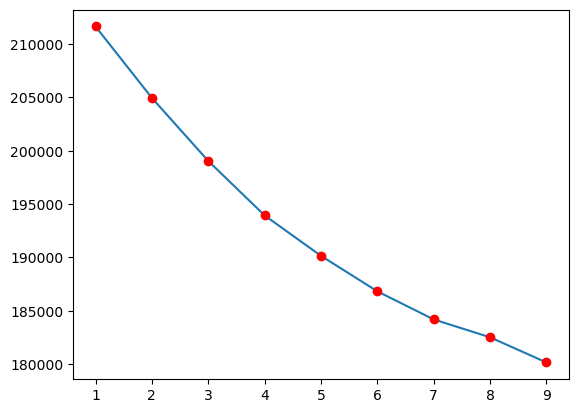

In [403]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [413]:
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/Users/Vera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 1, ..., 0, 3, 3], dtype=int32)

In [414]:
len(clusters)

1411

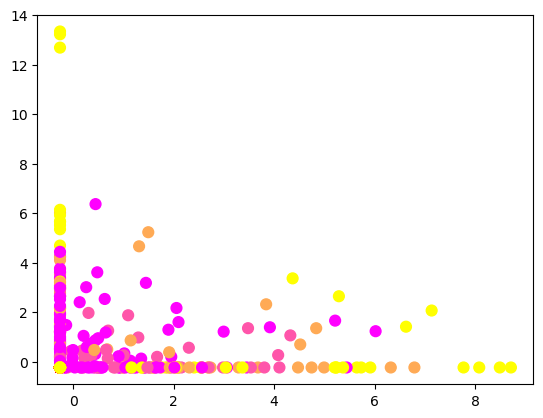

In [415]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='spring', c=clusters, s=60)